# AUTOMATIC LICENSE PLATE RECOGNITION
### YOLOv8 + OpenCV + EasyOCR

### Check GPU Access

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [6]:
!nvidia-smi

Fri Sep 19 21:32:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              6W /   65W |     611MiB /   6144MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

d:\Work\PT TPS\License Plate Detection


### Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103  Python-3.10.0 torch-2.8.0+cpu CPU (13th Gen Intel Core(TM) i5-13420H)
Setup complete  (12 CPUs, 15.7 GB RAM, 243.1/305.7 GB disk)


In [1]:
from ultralytics import YOLO

from IPython.display import display, Image

### CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

d:\Work\PT. Terminal Petikemas Surabaya\Project License Plate Detection & Recognition


C:\Users\gredy\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.8.0+cpu CPU (13th Gen Intel Core(TM) i5-13420H)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 d:\Work\PT. Terminal Petikemas Surabaya\Project License Plate Detection & Recognition\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 64.7ms
Speed: 1.0ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict
💡 Learn more at https://docs.ultralytics.com/modes/predict



  0%|          | 0.00/6.25M [00:00<?, ?B/s]
  2%|▏         | 128k/6.25M [00:00<00:09, 663kB/s]
  4%|▍         | 256k/6.25M [00:00<00:08, 756kB/s]
  8%|▊         | 512k/6.25M [00:00<00:04, 1.23MB/s]
 10%|█         | 640k/6.25M [00:00<00:05, 1.15MB/s]
 14%|█▍        | 896k/6.25M [00:00<00:05, 1.02MB/s]
 16%|█▌        | 1.00M/6.25M [00:01<00:05, 921kB/s]
 20%|██        | 1.25M/6.25M [00:01<00:04, 1.12MB/s]
 26%|██▌       | 1.62M/6.25M [00:01<00:03, 1.46MB/s]
 30%|███       | 1.88M/6.25M [00:01<00:03, 1.50MB/s]
 34%|███▍      | 2.12M/6.25M [00:01<00:03, 1.20MB/s]
 38%|███▊      | 2.38M/6.25M [00:02<00:02, 1.41MB/s]
 44%|████▍     | 2.75M/6.25M [00:02<00:02, 1.54MB/s]
 50%|█████     | 3.12M/6.25M [00:02<00:01, 1.90MB/s]
 56%|█████▌    | 3.50M/6.25M [00:02<00:01, 2.23MB/s]
 60%|██████    | 3.75M/6.25M [00:02<00:01, 1.73MB/s]
 64%|██████▍   | 4.00M/6.25M [00:02<00:01, 1.49MB/s]
 68%|██████▊   | 4.25M/6.25M [00:03<00:01, 1.60MB/s]
 74%|███████▍  | 4.62M/6.25M [00:03<00:00, 2.03MB/s]
 78%|████

d:\Work\PT. Terminal Petikemas Surabaya\Project License Plate Detection & Recognition


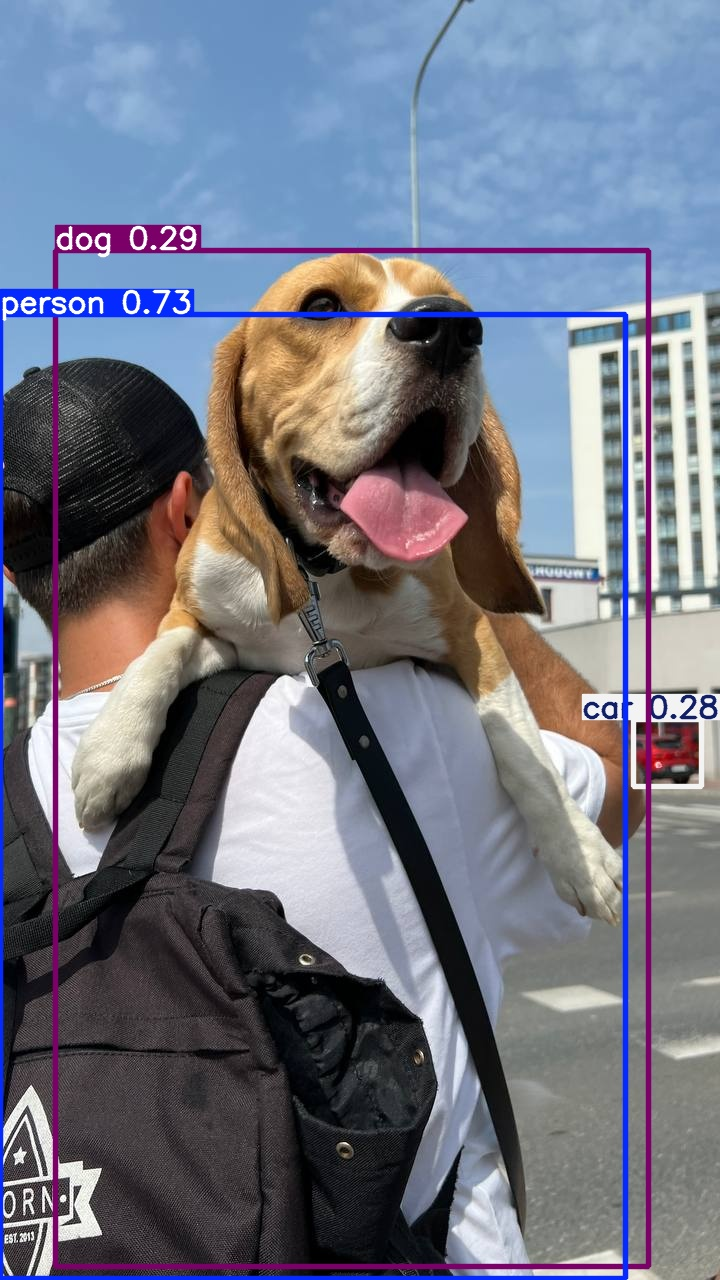

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 d:\Work\PT. Terminal Petikemas Surabaya\Project License Plate Detection & Recognition\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 58.1ms
Speed: 2.0ms preprocess, 58.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4714,  625.0755, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0337]])

In [9]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

### Preparing Dataset

🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [ ]:
import os

# Tentukan folder kerja
HOME = "D:/Work/PT TPS/License Plate Detection"

# Buat folder datasets
os.makedirs(os.path.join(HOME, "datasets"), exist_ok=True)

# Pindah directory
os.chdir(os.path.join(HOME, "datasets"))

print("Current dir:", os.getcwd())

# Import roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="ChkSaVX0UZ4xSJBsfWf1")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(1)
dataset = version.download("yolov8")


Current dir: D:\Work\PT. Terminal Petikemas Surabaya\Project License Plate Detection & Recognition\datasets
Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-1 in yolov8:: 100%|██████████| 20264/20264 [00:07<00:00, 2791.21it/s]


### Custom Training

In [28]:
# Cek GPU
import torch
print(torch.cuda.is_available())  # harus True
print(torch.cuda.get_device_name(0))  # harus "NVIDIA GeForce RTX 3050"
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)



True
NVIDIA GeForce RTX 3050 6GB Laptop GPU
2.8.0+cu129
True
12.9


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data="D:/Work/PT TPS/License Plate Detection/datasets/License-Plate-Recognition-1/data.yaml" epochs=25 imgsz=640 batch=8 device=0 plots=True patience=20

Traceback (most recent call last):
  File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\gredy\AppData\Roaming\Python\Python310\Scripts\yolo.exe\__main__.py", line 4, in <module>
  File "C:\Users\gredy\AppData\Roaming\Python\Python310\site-packages\ultralytics\__init__.py", line 11, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "C:\Users\gredy\AppData\Roaming\Python\Python310\site-packages\ultralytics\data\__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "C:\Users\gredy\AppData\Roaming\Python\Python310\site-packages\ultralytics\data\base.py", line 15, in <module>
    from torch.utils.data import Dataset
ModuleNotFoundError: No module named 'torch'


d:\Work\PT TPS\License Plate Detection


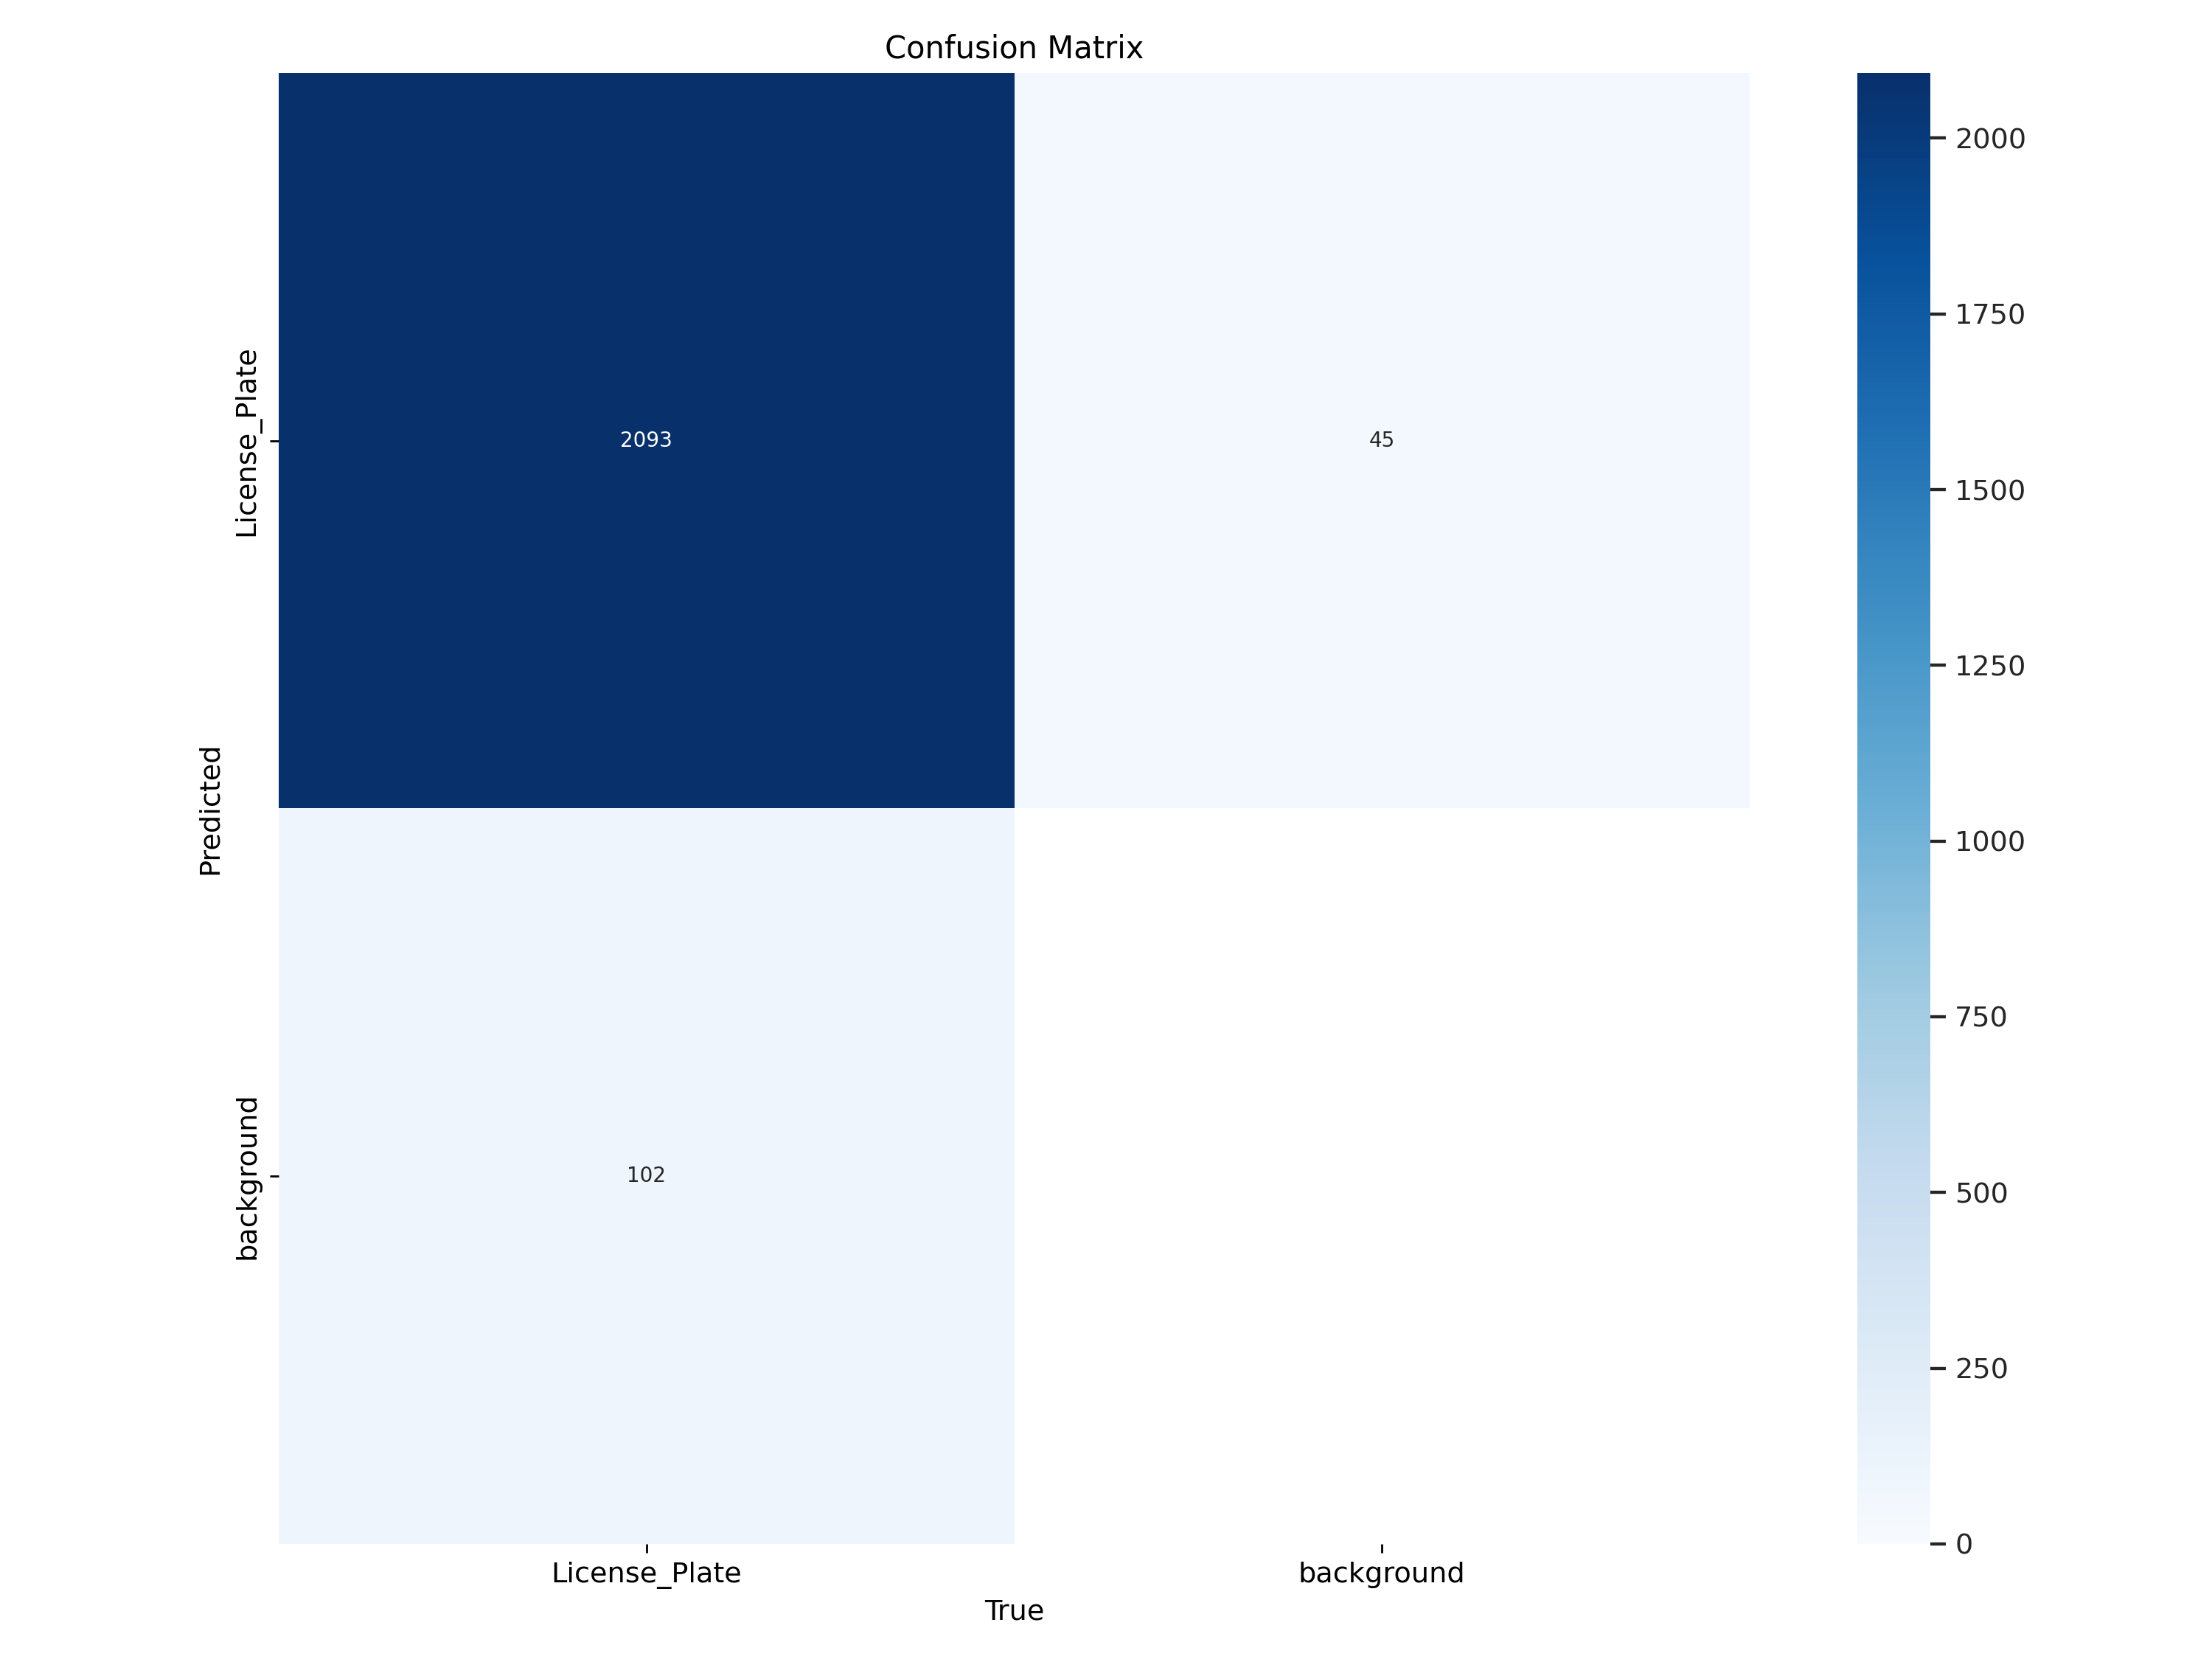

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

d:\Work\PT TPS\License Plate Detection


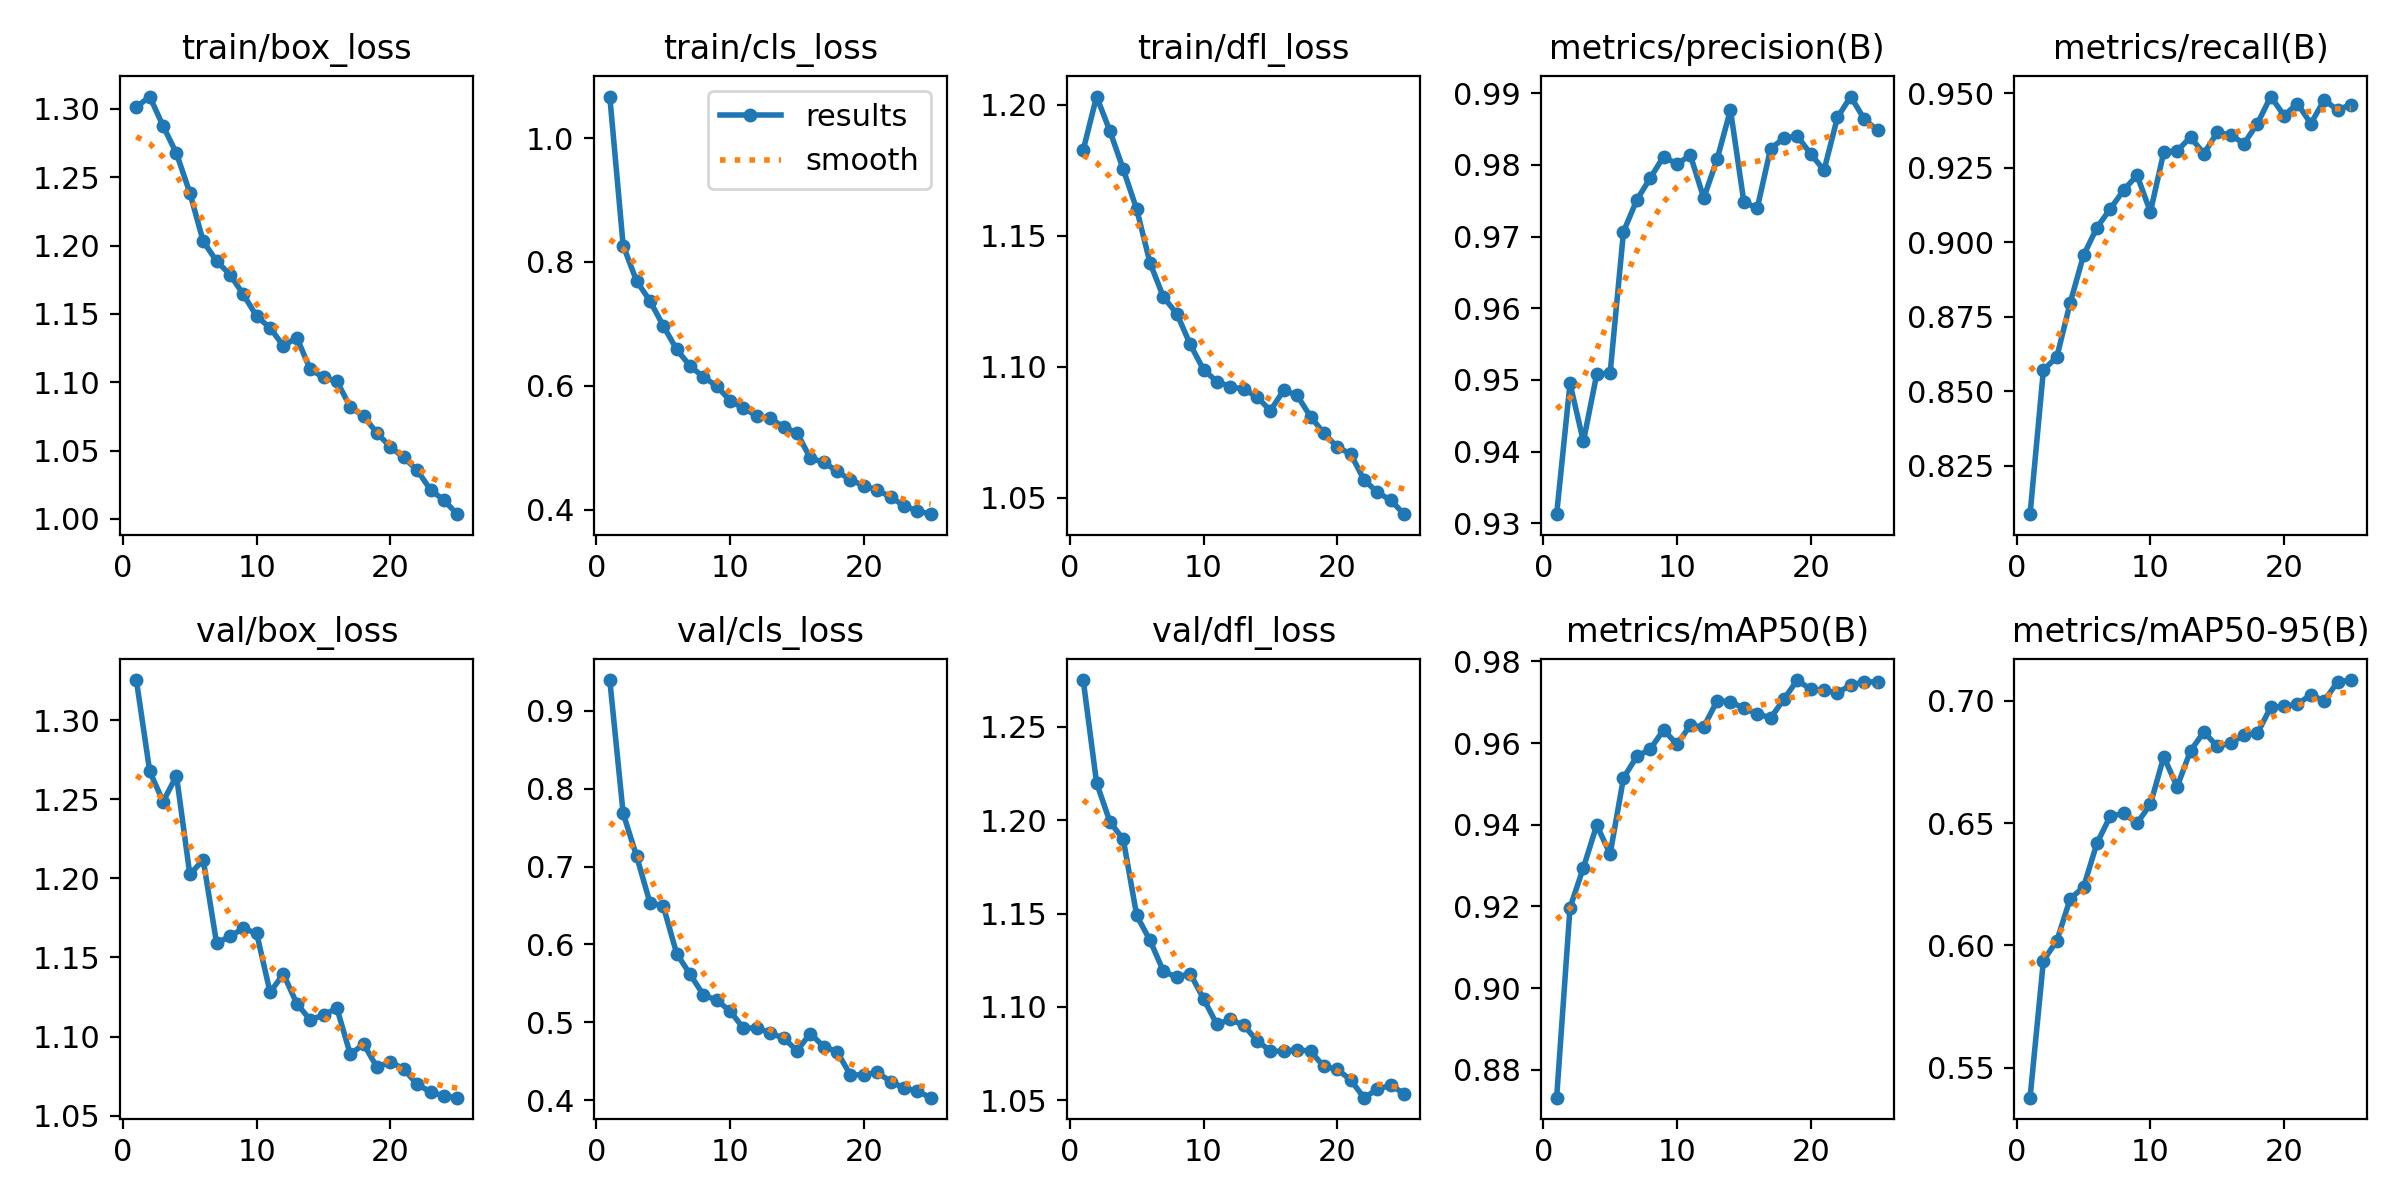

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

d:\Work\PT TPS\License Plate Detection


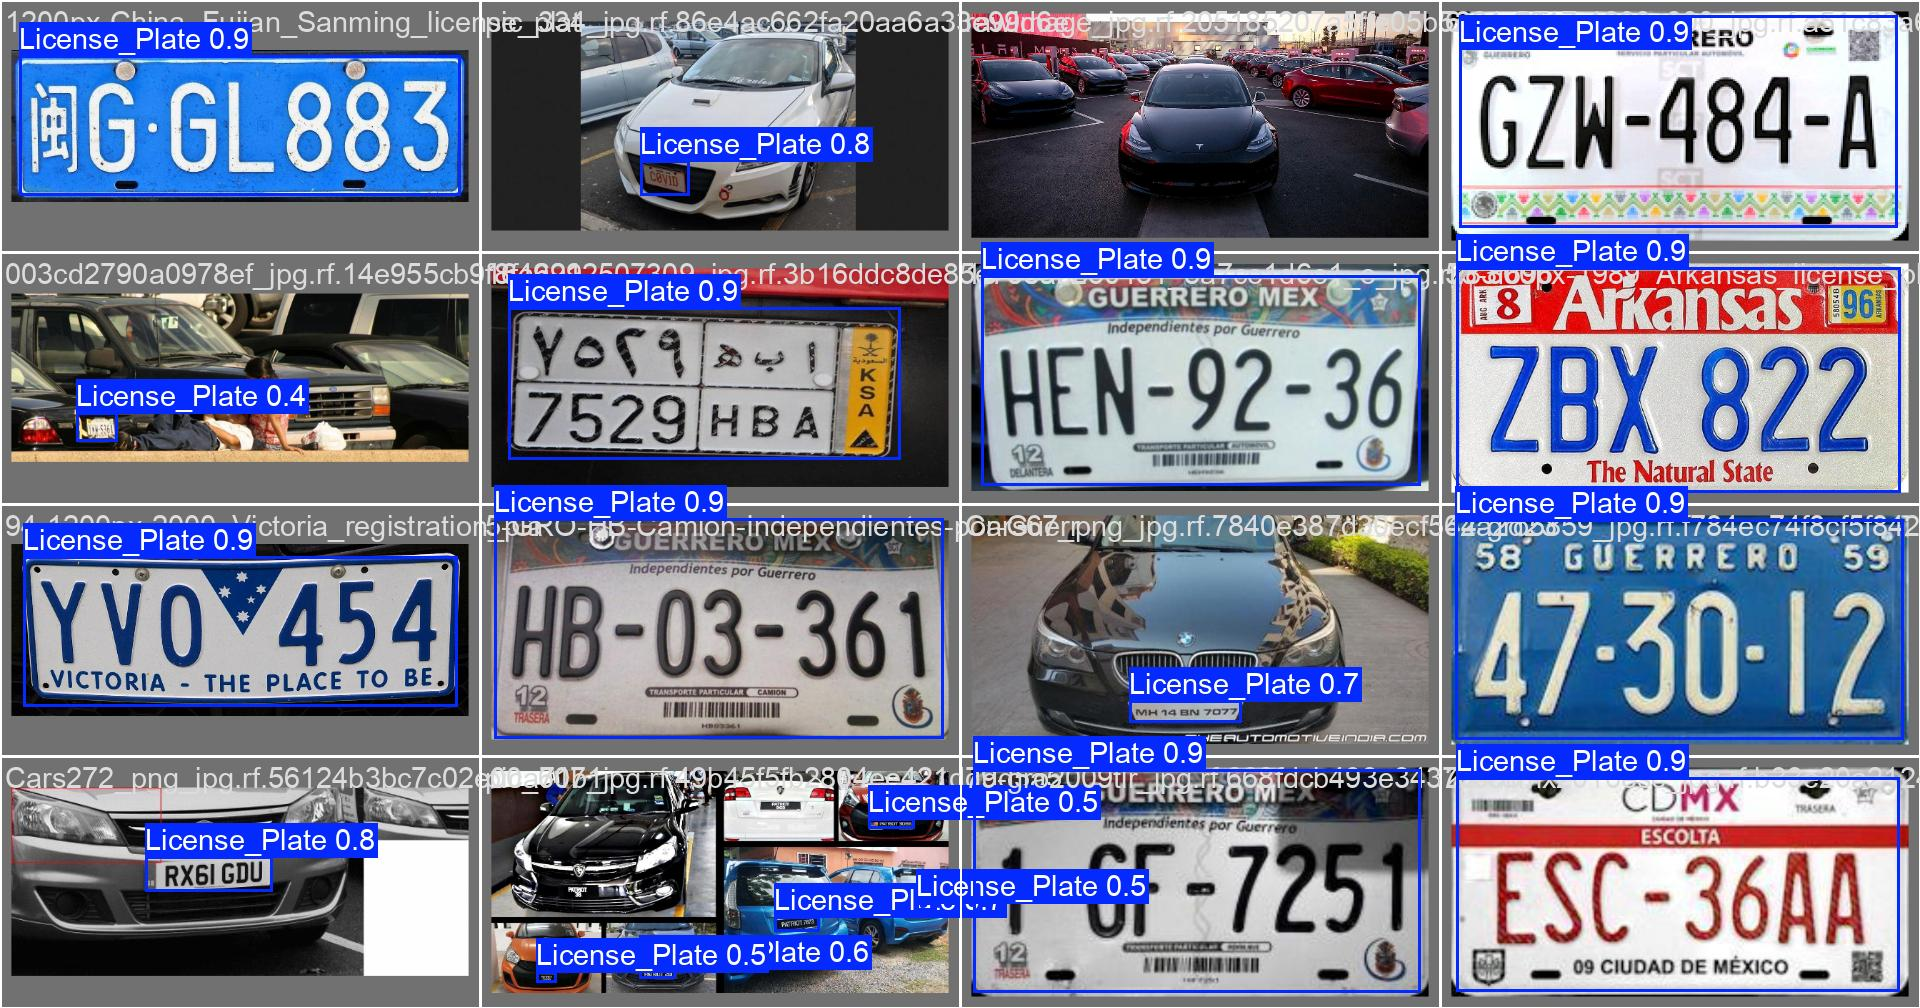

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1080)

### Validate Custom Model

In [2]:
!yolo task=detect mode=val model="D:/Work/PT TPS/License Plate Detection/runs/detect/train/weights/best.pt" data="D:/Work/PT TPS/License Plate Detection/datasets/License-Plate-Recognition-1/data.yaml"


Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
                   all       2048       2134      0.977      0.966      0.986      0.719
Speed: 0.3ms preprocess, 8.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val3
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\valid\labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]
val: Scanning D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\valid\labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/128 [00:00<00:57,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 2/128 [00:00<00:38,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/128 [00:00<00:32,  3.83it/s]
                 Class     Images  Instances      Box(P         

### Inference with Custom Model

In [ ]:
# Inference in Images
!yolo task=detect mode=predict model="D:/Work/PT TPS/License Plate Detection/runs/detect/train/weights/best.pt" conf=0.25 source="D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\test\images" save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1020 D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\test\images\0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 480x640 2 License_Plates, 84.1ms
image 2/1020 D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\test\images\000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 576x640 1 License_Plate, 76.0ms
image 3/1020 D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\test\images\0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 480x640 1 License_Plate, 11.1ms
image 4/1020 D:\Work\PT TPS\License Plate Detection\datasets\License-Plate-Recognition-1\test\images\001cdd25e148cd36_jpg.rf.f6b127a00cc60969152a8a039351ce11.jpg: 480x640 1 License_Plate, 10.0ms
image 5/1020 D:\Wor

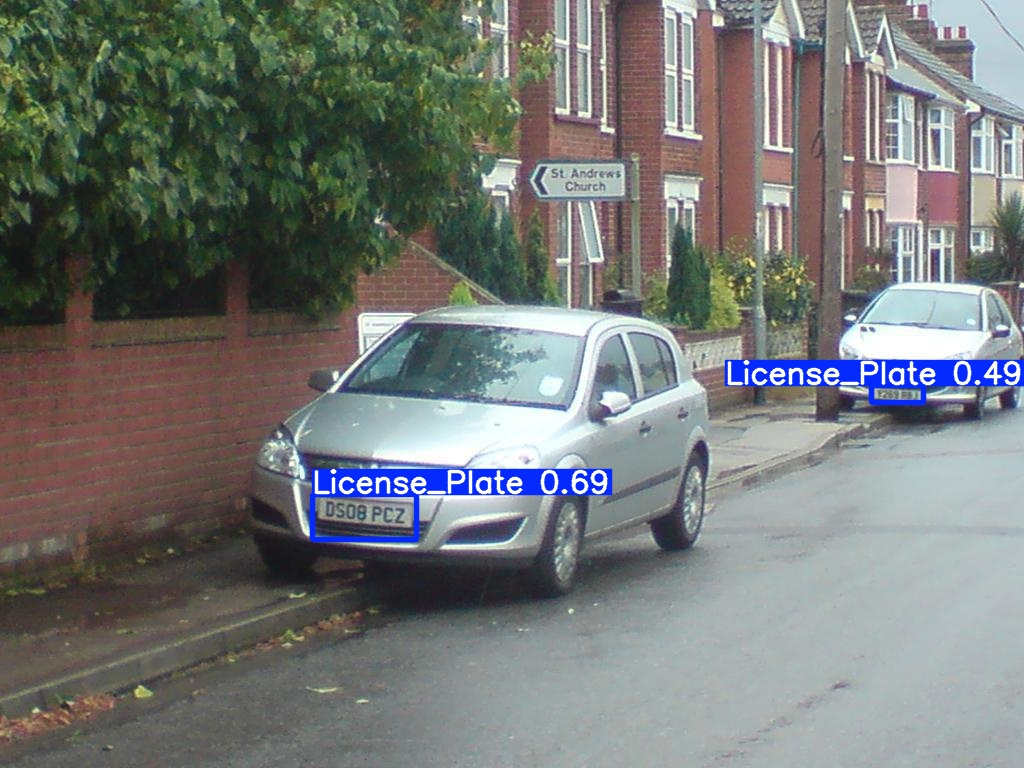

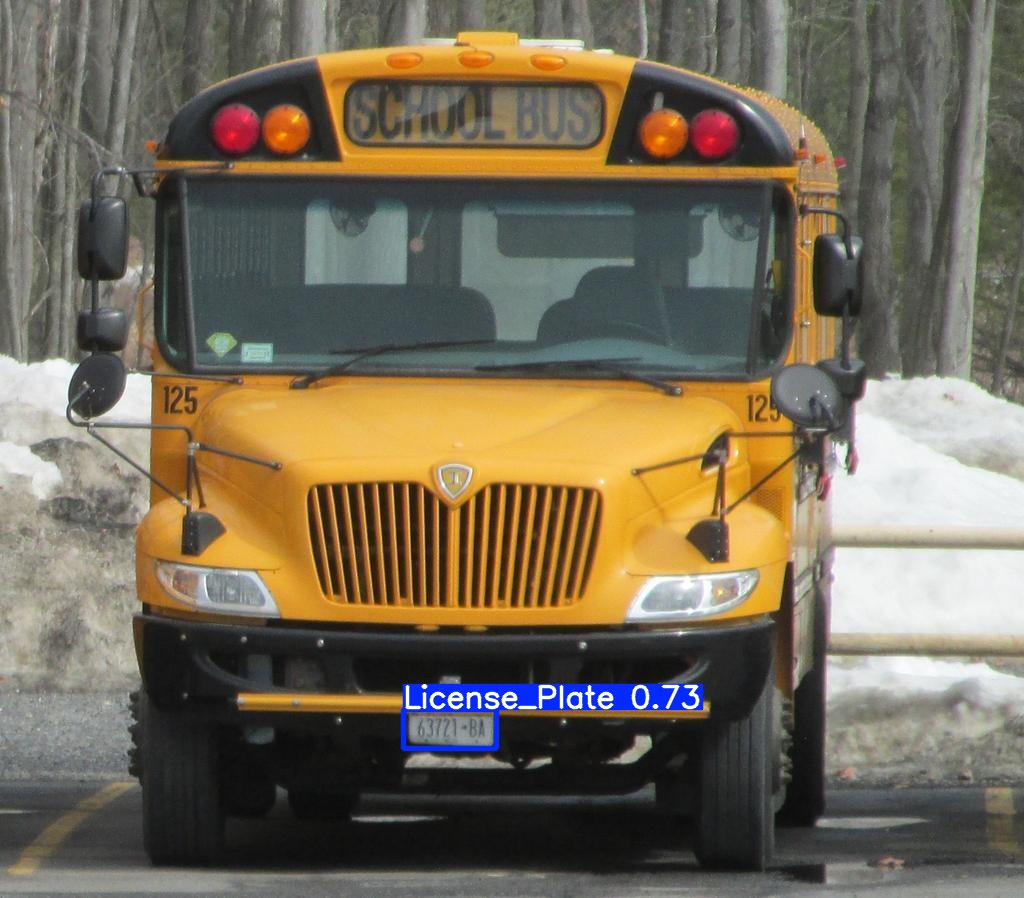

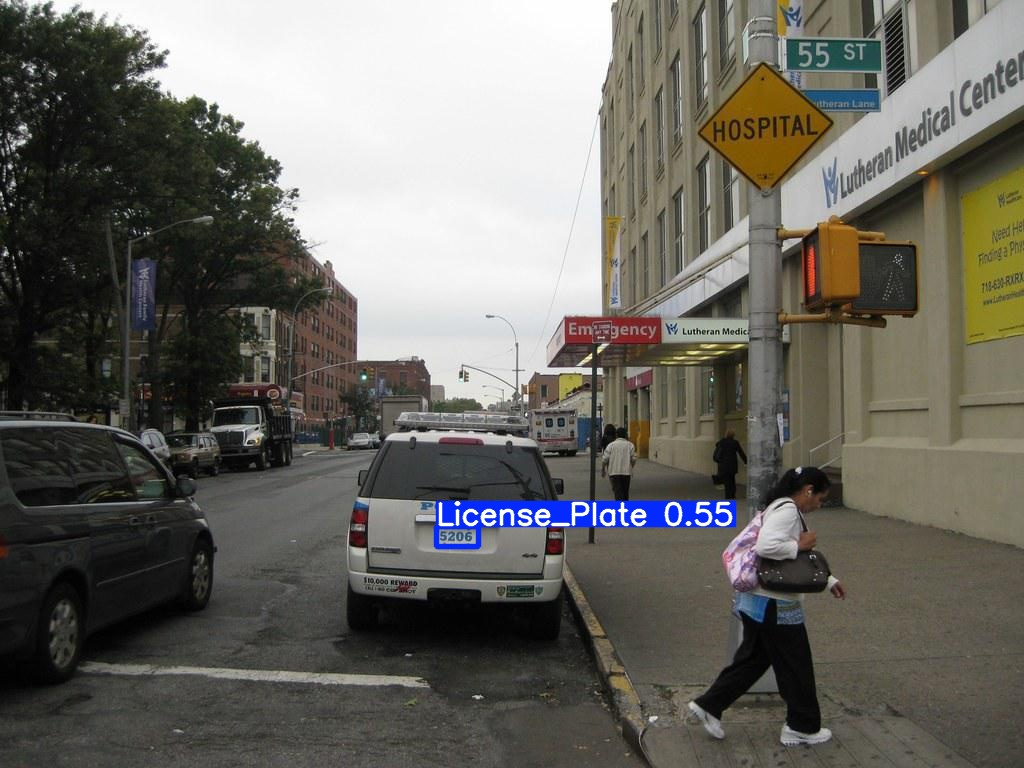

In [29]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = r"D:\Work\PT TPS\License Plate Detection\runs\detect"

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")


### Realtime Inference

##### *A. Realtime License Plate Detection*

In [29]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load model
model = YOLO(r"D:\Work\PT TPS\License Plate Detection\runs\detect\train\weights\best.pt")

mediasource = "Traffic_Light.mp4"
cap = cv2.VideoCapture(mediasource)

if not cap.isOpened():
    print("❌ Video tidak terbuka")
    exit()

cv2.namedWindow("License Plate Detection", cv2.WINDOW_NORMAL)  # window bisa diresize bebas

def resize_with_aspect_ratio(image, target_w, target_h):
    h, w = image.shape[:2]
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
    return canvas

while True:
    ret, frame = cap.read()
    if not ret:
        # jika video selesai, ulang dari awal
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue

    # YOLO detection
    results = model(frame, verbose=False)
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Resize agar tetap aspect ratio
    try:
        _, _, win_w, win_h = cv2.getWindowImageRect("License Plate Detection")
        if win_w > 0 and win_h > 0:
            display_frame = resize_with_aspect_ratio(frame, win_w, win_h)
        else:
            display_frame = frame
    except:
        display_frame = frame

    cv2.imshow("License Plate Detection", display_frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


c:\Users\gredy\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:548: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, m

In [7]:
# Backup A

import cv2
from ultralytics import YOLO

# Load model hasil training
model = YOLO(r"D:\Work\PT TPS\License Plate Detection\runs\detect\train\weights\best.pt")

# Menentukan path source
mediasource = "Traffic_Light.mp4"

# Buka webcam (0 = webcam default) atau video
cap = cv2.VideoCapture(mediasource)

if not cap.isOpened():
    print("❌ Webcam tidak terbuka")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Gagal membaca frame")
        break

    # Inference YOLO (deteksi plat)
    results = model(frame, verbose=False)

    # Loop hasil deteksi
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Ambil koordinat kotak
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box
            conf = float(box.conf[0])               # confidence
            cls = int(box.cls[0])                   # class id
            label = model.names[cls]                # class name

            # Gambar kotak + teks di frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}",
                        (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (0, 255, 0), 2)

    # Tampilkan frame dengan kotak deteksi
    cv2.imshow("License Plate Detection", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


##### *B. Realtime License Plate Detection Capture and Non-Realtime Recognition*

In [3]:
# DEFINE LIB
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
import cv2
import easyocr
import os
import datetime
import re

In [9]:
# ===========================
# CELL 1: Live YOLO Detection
# ===========================

# Load YOLO model
model = YOLO(
    r"D:\Work\PT TPS\License Plate Detection\runs\detect\train\weights\best.pt"
)

# Source media
mediasource = "TrafficIPCam_Japan.mp4"
cap = cv2.VideoCapture(mediasource)
if not cap.isOpened():
    print("❌ Video tidak terbuka")
    exit()

# Buat folder capture jika belum ada
os.makedirs("capture", exist_ok=True)

cv2.namedWindow("Deteksi Plat Nomor", cv2.WINDOW_NORMAL)


# Fungsi resize sesuai window
def resize_with_aspect_ratio(image, target_w, target_h):
    h, w = image.shape[:2]
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2
    canvas[y_offset : y_offset + new_h, x_offset : x_offset + new_w] = resized
    return canvas


while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Video selesai atau gagal membaca frame")
        break

    # Salinan frame untuk ditampilkan
    display_frame = frame.copy()

    # Deteksi dengan YOLO
    results = model(frame, verbose=False)

    # Gambar bounding box hanya di display_frame
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = model.names[cls]

        cv2.rectangle(display_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            display_frame,
            f"{label} {conf:.2f}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2,
        )

    # Resize display_frame sesuai window
    try:
        _, _, win_w, win_h = cv2.getWindowImageRect("Deteksi Plat Nomor")
        if win_w > 0 and win_h > 0:
            display_frame_resized = resize_with_aspect_ratio(
                display_frame, win_w, win_h
            )
        else:
            display_frame_resized = display_frame
    except:
        display_frame_resized = display_frame

    cv2.imshow("Deteksi Plat Nomor", display_frame_resized)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        for idx, box in enumerate(results[0].boxes):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            margin = 10
            x1 = max(0, x1 - margin)
            y1 = max(0, y1 - margin)
            x2 = min(frame.shape[1], x2 + margin)
            y2 = min(frame.shape[0], y2 + margin)

            # Crop dari frame asli (bersih, tanpa bounding box)
            crop = frame[y1:y2, x1:x2]
            filename = f"capture/plate_{timestamp}_{idx}.jpg"
            cv2.imwrite(filename, crop)
            print(f"✅ Disimpan: {filename}")
    elif key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

c:\Users\gredy\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:548: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, m

✅ Disimpan: capture/plate_20250926_103412_0.jpg
✅ Disimpan: capture/plate_20250926_103426_0.jpg
✅ Disimpan: capture/plate_20250926_103426_1.jpg
✅ Disimpan: capture/plate_20250926_103426_2.jpg


In [5]:
def pre_denoise(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, h=15)  
    return denoised

def pre_sharpen(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)
    return sharpened

def pre_contrast(img, alpha=1.5, beta=20):
    # alpha: contrast, beta: brightness
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    gray = cv2.cvtColor(adjusted, cv2.COLOR_BGR2GRAY)
    return gray

def pre_soft(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh


=== Semua kandidat angka (urut by score) ===
82545 | len=5 | score=531.42 | rel_area=0.481203 | cx=58.0 | prob=0.20 | raw='JA 82545'
👉 Angka utama terpilih: 82545  (dari token: 'JA 82545', conf=0.20)
👉 Jenis plat terdeteksi: KENDARAAN PRIBADI (warna dasar: hitam)


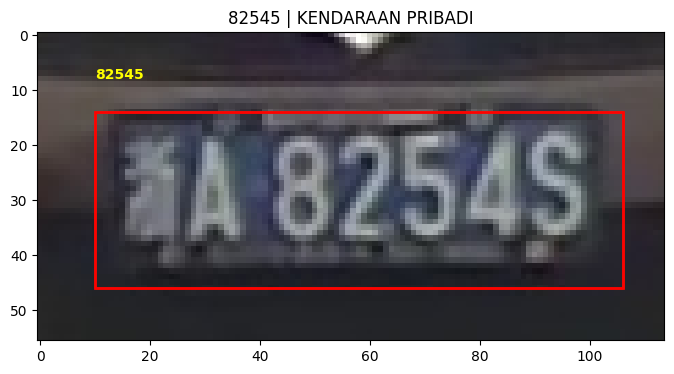

In [ ]:
import cv2, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import easyocr

# --- konfigurasi ---
image_path = "capture\plate_20250926_103426_1.jpg"  # ganti sesuai file
reader = easyocr.Reader(["en"])  # inisialisasi reader (lambat saat pertama kali)
# -------------------

# load image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {image_path}")
crop_processed = img

# OCR
results = reader.readtext(crop_processed)  # list of (bbox, text, prob)
# image dims (pakai original crop ukuran)
h_img, w_img = img.shape[:2]
center_x_img = w_img / 2.0


# ======================
# Warna dasar plat
# ======================
def detect_plate_color(plate_img):
    hsv = cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV)

    # definisi rentang warna (tuneable)
    mask_white = cv2.inRange(hsv, (0, 0, 180), (180, 40, 255))
    mask_black = cv2.inRange(hsv, (0, 0, 0), (180, 255, 50))
    mask_yellow = cv2.inRange(hsv, (15, 60, 120), (40, 255, 255))
    mask_red1 = cv2.inRange(hsv, (0, 70, 120), (10, 255, 255))
    mask_red2 = cv2.inRange(hsv, (170, 70, 120), (180, 255, 255))
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)
    mask_green = cv2.inRange(hsv, (35, 50, 70), (85, 255, 255))

    white_ratio = np.sum(mask_white > 0) / plate_img.size
    black_ratio = np.sum(mask_black > 0) / plate_img.size
    yellow_ratio = np.sum(mask_yellow > 0) / plate_img.size
    red_ratio = np.sum(mask_red > 0) / plate_img.size
    green_ratio = np.sum(mask_green > 0) / plate_img.size

    ratios = {
        "putih": white_ratio,
        "hitam": black_ratio,
        "kuning": yellow_ratio,
        "merah": red_ratio,
        "hijau": green_ratio,
    }
    color = max(ratios, key=ratios.get)

    # mapping ke jenis kendaraan
    mapping = {
        "putih": "KENDARAAN PRIBADI",
        "hitam": "KENDARAAN PRIBADI",
        "kuning": "UMUM",
        "merah": "PEMERINTAH",
        "hijau": "PERDAGANGAN BEBAS",
    }
    return color, mapping[color]


# ======================
# Helper OCR Gacor
# ======================
def bbox_metrics(bbox):
    xs = [float(p[0]) for p in bbox]
    ys = [float(p[1]) for p in bbox]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    w = max(1.0, x_max - x_min)
    h = max(1.0, y_max - y_min)
    area = w * h
    cx = (x_min + x_max) / 2.0
    cy = (y_min + y_max) / 2.0
    return x_min, y_min, x_max, y_max, w, h, area, cx, cy


def numeric_substrings(s):
    return re.findall(r"\d+", s)


# Kumpulkan kandidat: token yang punya numeric substring
candidates = []
for bbox, text, prob in results:
    raw_text = str(text)
    cleaned = re.sub(r"[^A-Za-z0-9]", "", raw_text).upper()
    nums = numeric_substrings(cleaned)
    if len(nums) == 0:
        continue
    num_sub = max(nums, key=len)
    x_min, y_min, x_max, y_max, w, h, area, cx, cy = bbox_metrics(bbox)
    rel_area = area / (w_img * h_img)
    dist_norm = abs(cx - center_x_img) / w_img
    nl = len(num_sub)
    score = nl * 10.0 + rel_area * 1000.0 - dist_norm * 20.0 + float(prob) * 2.0
    candidates.append(
        {
            "raw_text": raw_text,
            "cleaned": cleaned,
            "num_sub": num_sub,
            "num_len": nl,
            "prob": float(prob),
            "area": area,
            "rel_area": rel_area,
            "cx": cx,
            "dist_norm": dist_norm,
            "score": score,
            "bbox": bbox,
        }
    )

if not candidates:
    print(
        "⚠️ Tidak ada token berisi angka ditemukan oleh OCR. Menampilkan semua hasil RAW:"
    )
    for _, text, prob in results:
        print(f"RAW: {text} (conf: {prob:.2f})")
    plt.figure(figsize=(8, 3))
    plt.imshow(
        (
            crop_processed
            if crop_processed.ndim == 2
            else cv2.cvtColor(crop_processed, cv2.COLOR_BGR2GRAY)
        ),
        cmap="gray",
    )
    plt.axis("off")
    plt.show()
else:
    candidates.sort(key=lambda x: x["score"], reverse=True)
    selected = None
    for cand in candidates:
        if cand["num_len"] >= 2 and cand["num_len"] <= 4:
            selected = cand
            break
    if selected is None:
        selected = candidates[0]

    main_number = selected["num_sub"]
    print("=== Semua kandidat angka (urut by score) ===")
    for c in candidates:
        print(
            f"{c['num_sub']} | len={c['num_len']} | score={c['score']:.2f} | rel_area={c['rel_area']:.6f} | cx={c['cx']:.1f} | prob={c['prob']:.2f} | raw='{c['raw_text']}'"
        )
    print("===========================================")
    print(
        f"👉 Angka utama terpilih: {main_number}  (dari token: '{selected['raw_text']}', conf={selected['prob']:.2f})"
    )

    # 🔎 cek jenis plat dari warna
    color, jenis = detect_plate_color(crop_processed)
    print(f"👉 Jenis plat terdeteksi: {jenis} (warna dasar: {color})")

    # Visualisasi
    fig, ax = plt.subplots(1, 1, figsize=(9, 4))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    for c in candidates:
        bbox = c["bbox"]
        xs = [p[0] for p in bbox]
        ys = [p[1] for p in bbox]
        x_min, y_min = min(xs), min(ys)
        w_box = max(xs) - x_min
        h_box = max(ys) - min(ys)
        rect = patches.Rectangle(
            (x_min, y_min),
            w_box,
            h_box,
            linewidth=1,
            edgecolor="yellow",
            facecolor="none",
        )
        ax.add_patch(rect)
        ax.text(
            x_min, y_min - 6, c["num_sub"], color="yellow", fontsize=10, weight="bold"
        )
    bbox = selected["bbox"]
    xs = [p[0] for p in bbox]
    ys = [p[1] for p in bbox]
    x_min, y_min = min(xs), min(ys)
    w_box = max(xs) - x_min
    h_box = max(ys) - min(ys)
    rect = patches.Rectangle(
        (x_min, y_min), w_box, h_box, linewidth=2, edgecolor="red", facecolor="none"
    )
    ax.add_patch(rect)
    plt.title(f"{main_number} | {jenis}")
    plt.show()

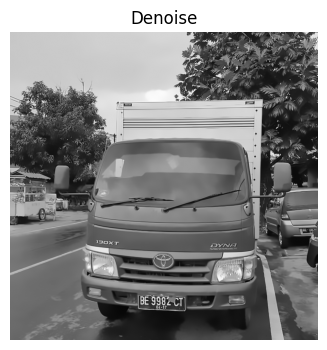

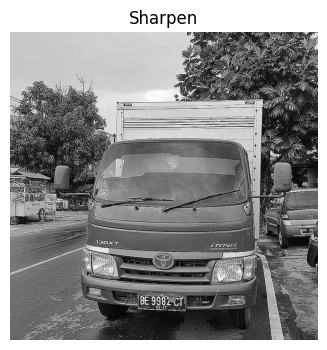

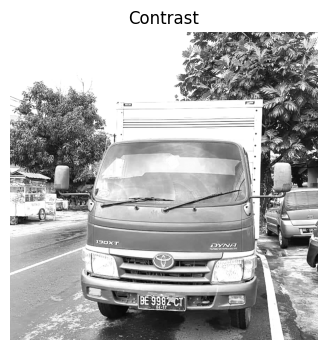

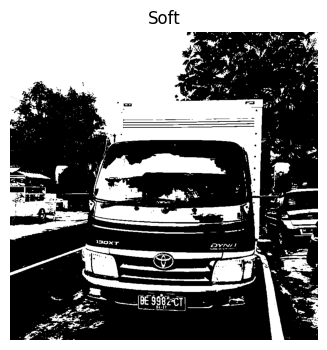

In [25]:
# 
# MEMBANDINGKAN HASIL PREPROCESSING PADA GAMBAR
# 

# --- Demo perbandingan (tanpa original, full size) ---
def show_preprocess_variants_full(path_img):
    img_ori = cv2.imread(path_img)

    variants = {
        "Denoise": pre_denoise(img_ori),
        "Sharpen": pre_sharpen(img_ori),
        "Contrast": pre_contrast(img_ori),
        "Soft": pre_soft(img_ori),
    }

    for title, processed in variants.items():
        plt.figure(figsize=(8, 4))
        plt.imshow(processed, cmap="gray")
        plt.title(title)
        plt.axis("off")
        plt.show()


# --- Contoh penggunaan ---
show_preprocess_variants_full("capture/trek.jpg")


##### *C. Realtime License Plate Character Recognition*

In [2]:
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr

# Load model YOLO dan EasyOCR
model = YOLO(r"D:\Work\PT TPS\License Plate Detection\runs\detect\train\weights\best.pt")
reader = easyocr.Reader(['en'], gpu=True)

# Regex format plat Indonesia
plate_pattern = re.compile(r"^[A-Z]{1,2}\s?[0-9]{1,4}\s?[A-Z]{0,3}$")

mediasource = "TrafficIPCam_Japan.mp4"  # webcam
cap = cv2.VideoCapture(mediasource)
vehicle_count = 0

cv2.namedWindow("License Plate Detection", cv2.WINDOW_NORMAL)  # window bisa diresize

def preprocess_roi(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    thr = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 31, 15)
    thr = cv2.resize(thr, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    return thr

def resize_with_aspect_ratio(image, target_w, target_h):
    h, w = image.shape[:2]
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
    return canvas

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)
    annotated_frame = frame.copy()

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            roi = frame[y1:y2, x1:x2]
            if roi.size == 0:
                continue

            processed_roi = preprocess_roi(roi)
            ocr_result = reader.readtext(processed_roi, detail=0,
                                         allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

            if ocr_result:
                text = " ".join(ocr_result).strip()
                if plate_pattern.match(text):
                    plate_text = text
                else:
                    plate_text = text

                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(annotated_frame, plate_text, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    try:
        _, _, win_w, win_h = cv2.getWindowImageRect("License Plate Detection")
        if win_w > 0 and win_h > 0:
            display_frame = resize_with_aspect_ratio(annotated_frame, win_w, win_h)
        else:
            display_frame = annotated_frame
    except:
        display_frame = annotated_frame

    cv2.imshow("License Plate Detection", display_frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('c'):
        vehicle_count += 1
        print(f"Kendaraan {vehicle_count}: {plate_text}")

cap.release()
cv2.destroyAllWindows()


c:\Users\gredy\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:548: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, m

In [1]:
import cv2

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)  # coba juga CAP_MSMF / CAP_VFW kalau gagal

if not cap.isOpened():
    print("❌ Webcam tidak terbuka")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Gagal baca frame")
        break

    cv2.imshow("Test Webcam", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/model-examples/football-players-obj-detection/2
Share your model with the world at: https://universe.roboflow.com/model-examples/football-players-obj-detection/model/2


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

# ALPR

In [1]:
# ===== Cell 0: Import & Konfigurasi Umum =====
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
import cv2
import easyocr
import os
import datetime
import re

# Jika perlu, cek versi OpenCV / other libs di sini
# print("OpenCV version:", cv2.__version__)  


c:\Users\gredy\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\utils\checks.py:17: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg


In [ ]:
# ===== Cell 1: Live YOLO Detection & Simpan Crop =====

# Load YOLO model
model = YOLO("runs/detect/rrain/weights/best.pt")

# Sumber video / kamera
mediasource = "TrafficIPCam_Japan.mp4"
cap = cv2.VideoCapture(mediasource)
if not cap.isOpened():
    print("❌ Video tidak terbuka")
    exit()

# Siapkan folder output
os.makedirs("capture", exist_ok=True)
cv2.namedWindow("Deteksi Plat Nomor", cv2.WINDOW_NORMAL)

def resize_with_aspect_ratio(img, target_w, target_h):
    h, w = img.shape[:2]
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    x_off = (target_w - new_w) // 2
    y_off = (target_h - new_h) // 2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = resized
    return canvas

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Video selesai atau gagal membaca frame")
        break

    display_frame = frame.copy()
    results = model(frame, verbose=False)

    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = model.names[cls]

        cv2.rectangle(display_frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(display_frame, f"{label} {conf:.2f}",
                    (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    try:
        _, _, win_w, win_h = cv2.getWindowImageRect("Deteksi Plat Nomor")
        if win_w > 0 and win_h > 0:
            disp = resize_with_aspect_ratio(display_frame, win_w, win_h)
        else:
            disp = display_frame
    except:
        disp = display_frame

    cv2.imshow("Deteksi Plat Nomor", disp)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        ts = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        for idx, box in enumerate(results[0].boxes):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            margin = 10
            x1 = max(0, x1 - margin)
            y1 = max(0, y1 - margin)
            x2 = min(frame.shape[1], x2 + margin)
            y2 = min(frame.shape[0], y2 + margin)
            crop = frame[y1:y2, x1:x2]
            fname = f"capture/plate_{ts}_{idx}.jpg"
            cv2.imwrite(fname, crop)
            print(f"✅ Disimpan: {fname}")

    elif key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


c:\Users\gredy\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:548: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, m

✅ Disimpan: capture/plate_20250926_133204_0.jpg
✅ Disimpan: capture/plate_20250926_133204_1.jpg
✅ Disimpan: capture/plate_20250926_133204_2.jpg


In [ ]:
# ===== Cell 2: Preprocessing Utility Functions =====

def pre_denoise(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, h=15)
    return denoised

def pre_sharpen(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)
    return sharpened

def pre_contrast(img, alpha=1.5, beta=20):
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    gray = cv2.cvtColor(adjusted, cv2.COLOR_BGR2GRAY)
    return gray

def pre_soft(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    _, thresh = cv2.threshold(blur, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh


In [ ]:
# ===== Cell 3: Load Crop & Setup OCR =====

# Path ke gambar hasil crop dari Cell 1
image_path = "capture/sumatra.jpg"
reader = easyocr.Reader(["en"])

img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Pilih preprocessing atau tidak
# crop_processed = pre_soft(img)
crop_processed = img  # disable preprocessing


In [9]:
# ===== Cell 4: Deteksi Warna Dasar Plat =====

def detect_plate_color(plate_img):
    hsv = cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV)

    mask_white = cv2.inRange(hsv, (0,0,180), (180,40,255))
    mask_black = cv2.inRange(hsv, (0,0,0), (180,255,50))
    mask_yellow = cv2.inRange(hsv, (15,60,120), (40,255,255))
    mask_red1 = cv2.inRange(hsv, (0,70,120), (10,255,255))
    mask_red2 = cv2.inRange(hsv, (170,70,120), (180,255,255))
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)
    mask_green = cv2.inRange(hsv, (35,50,70), (85,255,255))

    white_ratio  = np.sum(mask_white > 0) / plate_img.size
    black_ratio  = np.sum(mask_black > 0) / plate_img.size
    yellow_ratio = np.sum(mask_yellow > 0) / plate_img.size
    red_ratio    = np.sum(mask_red > 0) / plate_img.size
    green_ratio  = np.sum(mask_green > 0) / plate_img.size

    ratios = {
        "putih": white_ratio,
        "hitam": black_ratio,
        "kuning": yellow_ratio,
        "merah": red_ratio,
        "hijau": green_ratio,
    }
    color = max(ratios, key=ratios.get)
    mapping = {
        "putih": "KENDARAAN PRIBADI",
        "hitam": "KENDARAAN PRIBADI",
        "kuning": "UMUM",
        "merah": "PEMERINTAH",
        "hijau": "PERDAGANGAN BEBAS",
    }
    return color, mapping[color]


=== Semua kandidat angka (urut by score) ===
9982 | len=4 | score=47.69 | rel_area=0.006953 | cx=432.0 | prob=0.45 | raw='[BE 9982 CT}'
17 | len=2 | score=20.49 | rel_area=0.000617 | cx=432.0 | prob=0.01 | raw='0L.17'
3 | len=1 | score=8.90 | rel_area=0.002303 | cx=278.5 | prob=0.12 | raw=''3OXT'
👉 Angka utama terpilih: 9982 (token '[BE 9982 CT}', conf=0.45)
👉 Jenis plat terdeteksi: KENDARAAN PRIBADI (warna dasar: hitam)


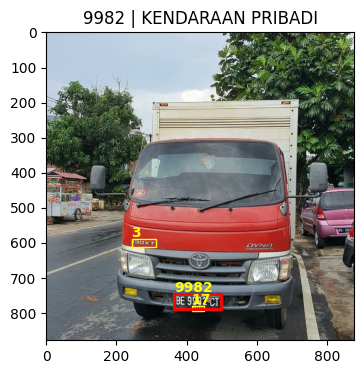

In [11]:
# ===== Cell 5: OCR Post-processing & Visualisasi =====

# Jalankan OCR dari EasyOCR
results = reader.readtext(crop_processed)

def bbox_metrics(bbox):
    xs = [float(p[0]) for p in bbox]
    ys = [float(p[1]) for p in bbox]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    w = max(1.0, x_max - x_min)
    h = max(1.0, y_max - y_min)
    area = w * h
    cx = (x_min + x_max) / 2.0
    cy = (y_min + y_max) / 2.0
    return x_min, y_min, x_max, y_max, w, h, area, cx, cy

def numeric_substrings(s):
    return re.findall(r"\d+", s)

# Kumpulkan kandidat
candidates = []
h_img, w_img = img.shape[:2]
center_x_img = w_img / 2.0

for bbox, text, prob in results:  # <-- sekarang valid
    raw_text = str(text)
    cleaned = re.sub(r"[^A-Za-z0-9]", "", raw_text).upper()
    nums = numeric_substrings(cleaned)
    if len(nums) == 0:
        continue
    num_sub = max(nums, key=len)
    x_min, y_min, x_max, y_max, w_box, h_box, area, cx, cy = bbox_metrics(bbox)
    rel_area = area / (w_img * h_img)
    dist_norm = abs(cx - center_x_img) / w_img
    nl = len(num_sub)
    score = nl * 10.0 + rel_area * 1000.0 - dist_norm * 20.0 + float(prob) * 2.0
    candidates.append({
        "raw_text": raw_text,
        "cleaned": cleaned,
        "num_sub": num_sub,
        "num_len": nl,
        "prob": float(prob),
        "area": area,
        "rel_area": rel_area,
        "cx": cx,
        "dist_norm": dist_norm,
        "score": score,
        "bbox": bbox,
    })

if not candidates:
    print("⚠️ Tidak ada token berisi angka ditemukan oleh OCR. Menampilkan semua hasil RAW:")
    for _, text, prob in results:
        print(f"RAW: {text} (conf: {prob:.2f})")
    plt.figure(figsize=(8, 3))
    plt.imshow(
        (crop_processed if crop_processed.ndim == 2 else cv2.cvtColor(crop_processed, cv2.COLOR_BGR2GRAY)),
        cmap="gray",
    )
    plt.axis("off")
    plt.show()
else:
    candidates.sort(key=lambda c: c["score"], reverse=True)
    selected = None
    for cand in candidates:
        if 2 <= cand["num_len"] <= 4:
            selected = cand
            break
    if selected is None:
        selected = candidates[0]

    main_number = selected["num_sub"]
    print("=== Semua kandidat angka (urut by score) ===")
    for c in candidates:
        print(
            f"{c['num_sub']} | len={c['num_len']} | score={c['score']:.2f} | "
            f"rel_area={c['rel_area']:.6f} | cx={c['cx']:.1f} | prob={c['prob']:.2f} | raw='{c['raw_text']}'"
        )
    print("===========================================")
    print(
        f"👉 Angka utama terpilih: {main_number} (token '{selected['raw_text']}', conf={selected['prob']:.2f})"
    )

    color, jenis = detect_plate_color(crop_processed)
    print(f"👉 Jenis plat terdeteksi: {jenis} (warna dasar: {color})")

    fig, ax = plt.subplots(1,1, figsize=(9,4))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    for c in candidates:
        bbox = c["bbox"]
        xs = [p[0] for p in bbox]
        ys = [p[1] for p in bbox]
        x_min, y_min = min(xs), min(ys)
        w_box = max(xs) - x_min
        h_box = max(ys) - y_min
        rect = patches.Rectangle((x_min, y_min), w_box, h_box,
                                 linewidth=1, edgecolor="yellow", facecolor="none")
        ax.add_patch(rect)
        ax.text(x_min, y_min - 6, c["num_sub"], color="yellow", fontsize=10, weight="bold")

    bbox = selected["bbox"]
    xs = [p[0] for p in bbox]
    ys = [p[1] for p in bbox]
    x_min, y_min = min(xs), min(ys)
    w_box = max(xs) - x_min
    h_box = max(ys) - y_min
    rect = patches.Rectangle((x_min, y_min), w_box, h_box,
                             linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    plt.title(f"{main_number} | {jenis}")
    plt.axis("on")
    plt.show()
